In [1]:
#Hand written Digits Recognition using Logistic Regression
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits


In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

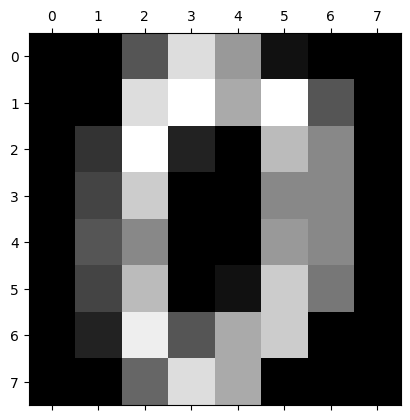

In [6]:
plt.gray()
plt.matshow(digits.images[0])

In [8]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(digits.data,digits.target,test_size=0.2)

In [10]:
len(xtrain),len(xtest)

(1437, 360)

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
model.score(xtest,ytest)

0.9527777777777777

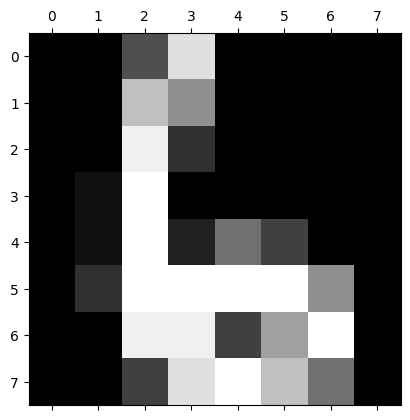

In [16]:
plt.matshow(digits.images[67])

In [17]:
model.predict([digits.data[67]]), digits.target[67] #matches

(array([6]), 6)

To know where the model fails/get overview of th trained model we find the confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix
y_predicted = model.predict(xtest)
cm = confusion_matrix(ytest, y_predicted)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  1,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  2,  1,  0],
       [ 0,  1,  0,  0, 26,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  1],
       [ 0,  2,  1,  0,  0,  1,  0,  0, 34,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 40]])

Text(95.72222222222221, 0.5, 'Truth')

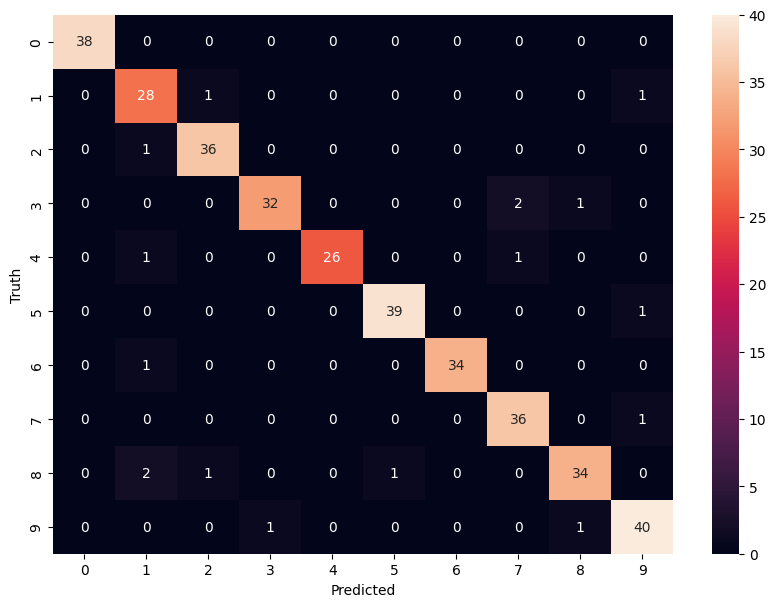

In [21]:
#confusion matrix visualization
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')